<a href="https://colab.research.google.com/github/Hiranayamay/salesforecastingusingtimeseries-ML-/blob/main/SalesForecastingusingML(time_series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import r2_score

In [ ]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


import numpy as np
from google.colab import autoviz
df_5473569814614716418 = autoviz.get_registered_df('df_5473569814614716418')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5473569814614716418, *['Perrin Freres monthly champagne sales millions ?64-?72'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3223437905037848057 = autoviz.get_registered_df('df_3223437905037848057')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3223437905037848057, *['Perrin Freres monthly champagne sales millions ?64-?72'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4018848975882659685 = autoviz.get_registered_df('df_4018848975882659685')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4018848975882659685, *['Month'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1518322171600983321 = autoviz.get_registered_df('df_1518322171600983321')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1518322171600983321, *['Perrin Freres monthly champagne sales millions ?64-?72', 'Month'], **{'inner': 'stick'})
chart

In [ ]:
df.tail()


,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
df.columns=["Months","Sales"]
df.head()

,Months,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.drop(106,axis=0,inplace=True)


In [ ]:
df.tail()

,Months,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Months,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
df['Months']=pd.to_datetime(df['Months'])

In [ ]:
df.head()

,Months,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Months',inplace=True)

In [ ]:
df.head()

,Sales
Months,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105 entries, 1964-01-01 to 1972-09-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


None

In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# **2.Visualize The Data**


<Axes: xlabel='Months'>

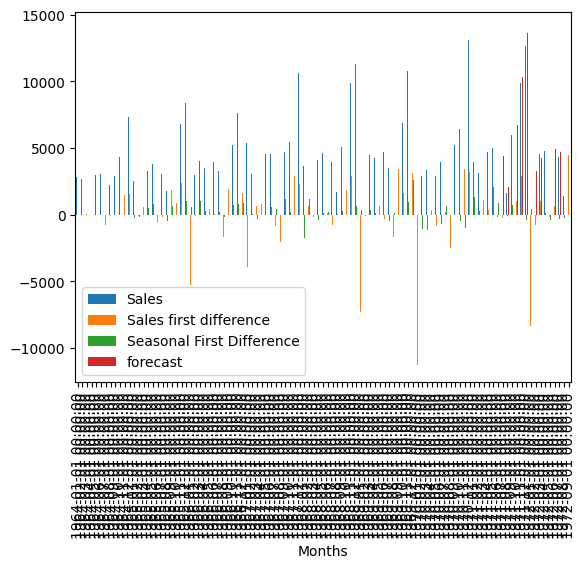

In [ ]:
df.plot.bar()

In [ ]:
#testing for stationary
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
#H0-It is non-stationary
#H1-It is stationary
def adfuller_test(Sales):
  result=adfuller(Sales)
  labels=['ADF Test Statistic','p-value','#lags used','No of observations used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
    if result[1]<=0.05:
      print("strong evidence against the null hypothesis(H0),reject the null hypothesis,data has no unit root")
    else:
      print("week evidence against the null hypothesis,time series has a unit root,indicating it is non stationary")

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
week evidence against the null hypothesis,time series has a unit root,indicating it is non stationary
p-value : 0.36391577166024586
week evidence against the null hypothesis,time series has a unit root,indicating it is non stationary
#lags used : 11
week evidence against the null hypothesis,time series has a unit root,indicating it is non stationary
No of observations used : 93
week evidence against the null hypothesis,time series has a unit root,indicating it is non stationary


# **Differencing**



In [ ]:
df['Sales first difference']=df['Sales']-df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Months
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales first difference,Seasonal First Difference
Months,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
strong evidence against the null hypothesis(H0),reject the null hypothesis,data has no unit root
p-value : 2.0605796968136632e-11
strong evidence against the null hypothesis(H0),reject the null hypothesis,data has no unit root
#lags used : 0
strong evidence against the null hypothesis(H0),reject the null hypothesis,data has no unit root
No of observations used : 92
strong evidence against the null hypothesis(H0),reject the null hypothesis,data has no unit root


<Axes: xlabel='Months'>

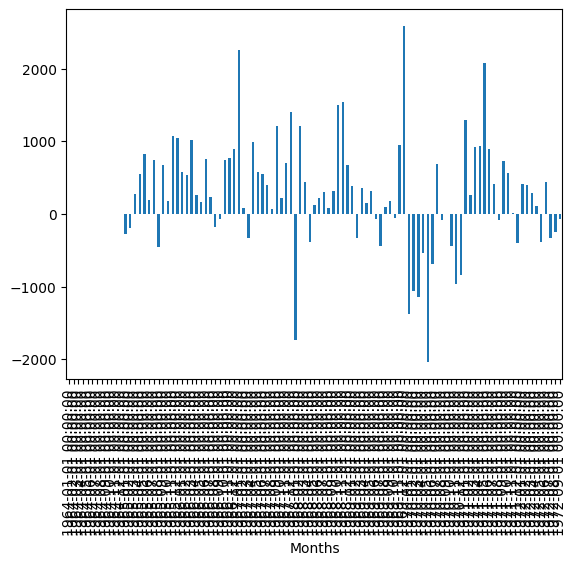

In [ ]:
df['Seasonal First Difference'].plot.bar()

# Auto Regressive **Model**

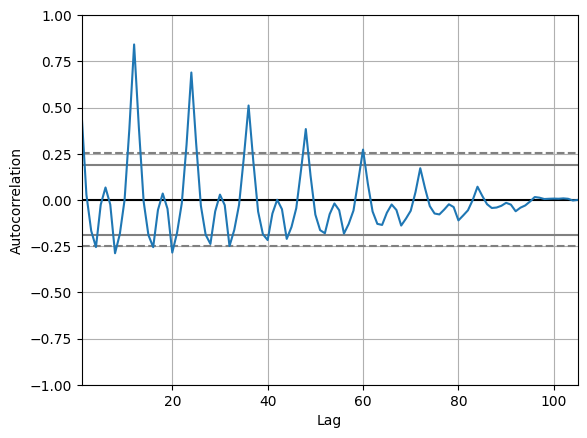

In [ ]:

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


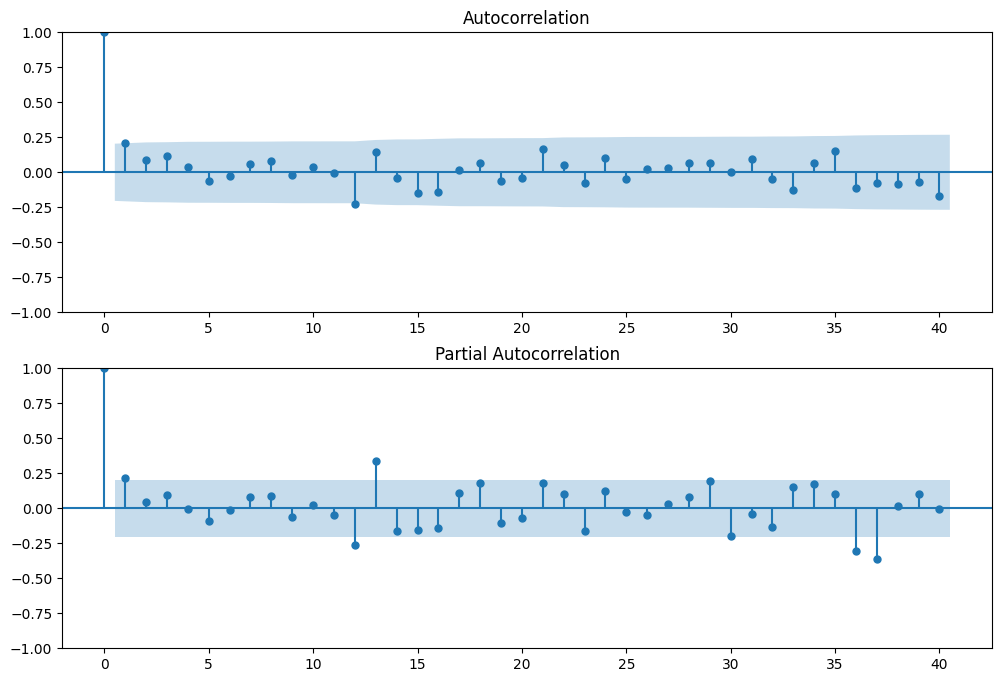

In [ ]:
fig= plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
#for non seasonal data
#p=1,d=1,q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 16 Jul 2023   AIC                           1911.627
Time:                        03:26:12   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

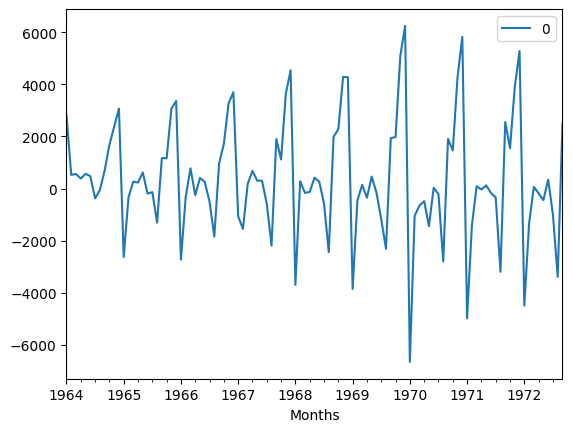

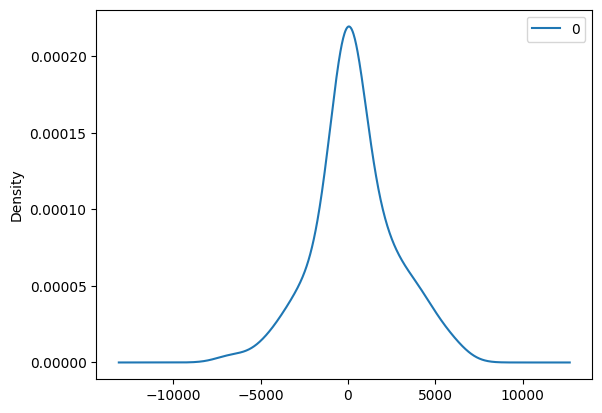

                 0
count   105.000000
mean    385.652673
std    2276.255960
min   -6658.225078
25%    -506.297027
50%     229.442849
75%    1678.826765
max    6244.573144


In [ ]:
residuals=pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

As we can see mean is not exactly zero it tells there is some bias in data

# Accuracy of ARIMA

In [ ]:
#accuracy prediction value
predicted=model_fit.predict(start='1964-01',end='1972-09')

In [ ]:
print(len(predicted))

105


In [ ]:
actual=df['Sales']['1964-01':'1972-09']

In [ ]:
print(len(actual))

105


In [ ]:

mae=mean_absolute_error(actual,predicted)
mse=mean_squared_error(actual,predicted)
rmse=mse**0.5
r2=r2_score(actual,predicted)

In [ ]:
print(f"ARIMA:")
print(f"Mean Absolute Error(MAE):{mae}")
print(f"Mean Squared Error(MSE):{mse}")
print(f"Root Mean Squared Error(RMSE):{rmse}")
print(f"R-squared(R2_score):{r2}")

ARIMA:
Mean Absolute Error(MAE):1639.011337775264
Mean Squared Error(MSE):5280723.072499227
Root Mean Squared Error(RMSE):2297.982391686069
R-squared(R2_score):0.18233248562382975


<Axes: xlabel='Months'>

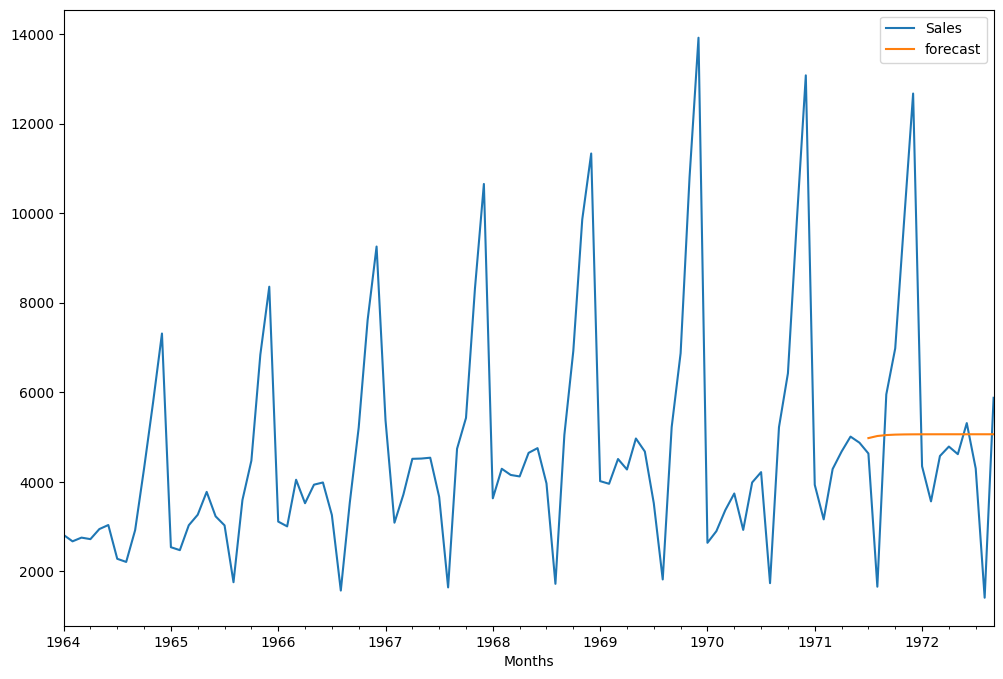

In [ ]:
df['forecast']=model_fit.predict(start=90,end=120,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sun, 16 Jul 2023   AIC                           1486.804
Time:                                    03:26:15   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predicted1=results.predict(start='1964-01',end='1972-09')

In [ ]:
actual1=df['Sales']['1964-01':'1972-09']

In [ ]:
mae1=mean_absolute_error(actual1,predicted1)
mse1=mean_squared_error(actual1,predicted1)
rmse1=mse**0.5
r21=r2_score(actual1,predicted1)

In [ ]:
print(f"SARIMA:")
print(f"Mean squared Error(MSE):{mse1}")
print(f"Mean Absolute Error(MAE):{mae1}")
print(f"Root Mean Square Error(RMSE):{rmse1}")
print(f"R-Squared(R2):{r21}")

SARIMA:
Mean squared Error(MSE):988527.2466570501
Mean Absolute Error(MAE):638.6493483139968
Root Mean Square Error(RMSE):2297.982391686069
R-Squared(R2):0.846936374892189


In [ ]:
forecast=results.forecast(steps=12*5)


In [ ]:
forecast_values=forecast.values

In [ ]:
print(forecast_values)

[ 7023.6988228   9996.17585107 12891.99830463  4561.37946638
  3718.69464952  4792.23995496  5034.49002089  5047.83639283
  5488.45293093  4593.50778446  1676.0184609   6144.75049933
  7261.94611021 10194.42268241 13057.17002654  4730.97805273
  3915.10031598  4961.17542573  5189.23750144  5119.27995005
  5675.02709275  4725.98728125  1823.26018572  6289.8421485
  7420.44312712 10371.09469189 13248.87036057  4920.66695426
  4092.60889535  5151.16562686  5385.67429397  5353.56751265
  5857.00280894  4932.54196859  2023.10736546  6490.66625724
  7615.17624432 10557.56964504 13428.51689995  5101.22742741
  4278.70373658  5331.58919864  5563.16873061  5513.86371015
  6041.06791901  5105.43914144  2199.05222584  6666.16723079
  7793.44477924 10739.59043863 13613.64031715  5285.93558089
  4460.89724147  5516.35955594  5749.26999787  5707.7793344
  6224.18367203  5293.62926559  2385.85757344  6853.17426707]


<Axes: xlabel='Months'>

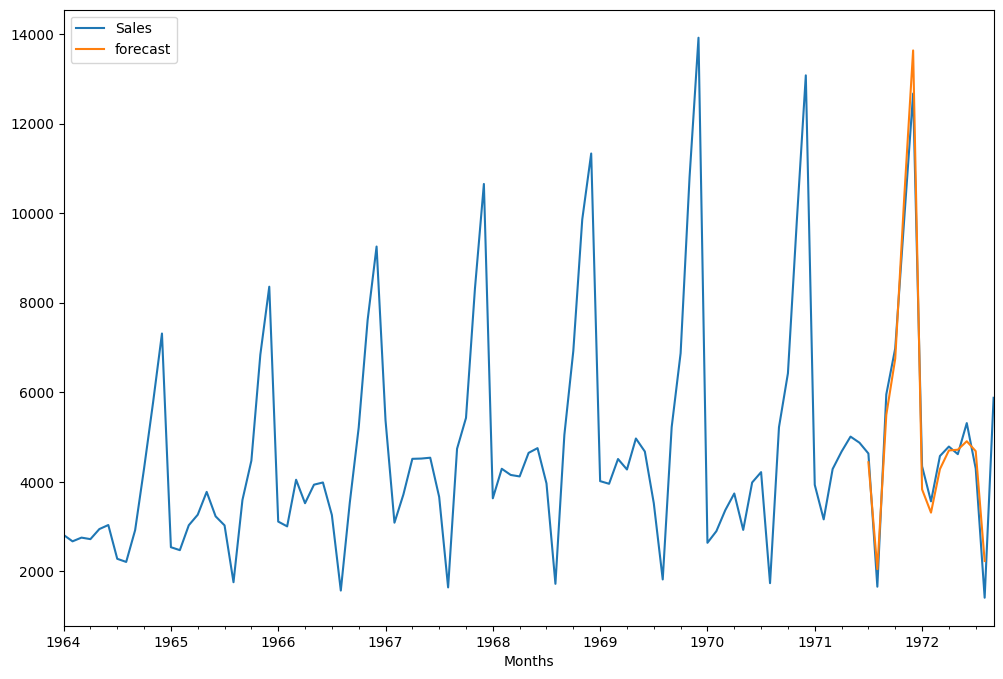

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(0,5*12)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

In [ ]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

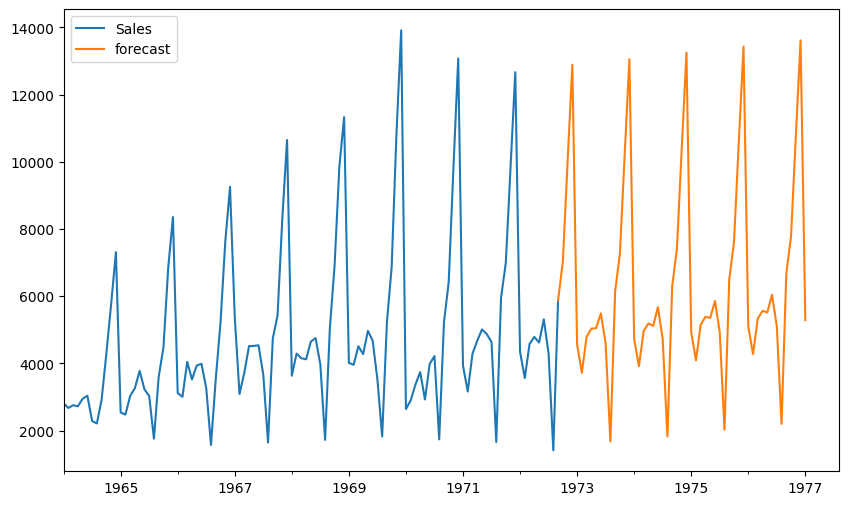

In [ ]:
future_df['forecast']=results.predict(start=104,end=156,dynamic=True)
future_df[['Sales','forecast']].plot(figsize=(10,6))